<a href="https://colab.research.google.com/github/SophieShin/ML_selfstudy/blob/main/W3_Classification%2BCross_val(breast_cancer_example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [6]:
breast_cancer = load_breast_cancer()
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [11]:
X = breast_cancer.data
y = breast_cancer.target

df = pd.DataFrame(X, columns = breast_cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)

(398, 30)
(398,)


In [16]:
print(len(X_train))
print(len(X_test))

398
171


In [17]:
knn = KNeighborsClassifier(n_neighbors= 5, weights = 'distance')

knn.fit(X_train, y_train)

label_predict = knn.predict(X_test)

print('The accuracy score of classification : %.9f' % accuracy_score(y_test, label_predict))


The accuracy score of classification : 0.947368421


In [18]:
# to get the number of optimal K

my_list = list(range(1, 100, 2))
neighbors = [x for x in my_list]
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]


In [19]:
cv_scores = []
for k in neighbors :
  print('k = %d' % k)
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
  print('The scores of classification are \n' + str(scores))
  cv_scores.append(scores.mean())
  print('The average score of scores is %.3f' % scores.mean())

k = 1
The scores of classification are 
[0.975      0.9        0.875      0.85       0.875      0.9
 0.875      1.         0.92307692 0.92307692]
The average score of scores is 0.910
k = 3
The scores of classification are 
[0.975      0.9        0.95       0.875      0.875      0.925
 0.925      0.925      0.94871795 0.94871795]
The average score of scores is 0.925
k = 5
The scores of classification are 
[0.975      0.9        0.9        0.9        0.9        0.95
 0.9        0.925      0.94871795 0.92307692]
The average score of scores is 0.922
k = 7
The scores of classification are 
[0.975      0.875      0.9        0.9        0.925      0.975
 0.9        0.925      0.94871795 0.94871795]
The average score of scores is 0.927
k = 9
The scores of classification are 
[0.975      0.875      0.9        0.9        0.925      0.975
 0.9        0.9        0.94871795 0.94871795]
The average score of scores is 0.925
k = 11
The scores of classification are 
[0.975      0.875      0.925      0.9

In [20]:
MSE = [1- x for x in cv_scores]

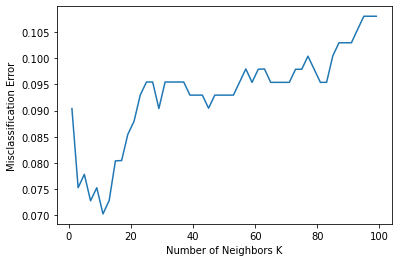

The optimal number of neighbors i is 11.


In [22]:
import matplotlib.pyplot as plt

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

min_MSE = min(MSE)
index_of_min_MSE = MSE.index(min_MSE)
optimal_K = neighbors[index_of_min_MSE]
print('The optimal number of neighbors i is %d.' % optimal_K)